# This is a notebook for Coursera IBM Data Science Capstone project

### Introduction of Business Problem

The ultimate purpose of this project is to prevent avoidable car accidents by alerting drivers and relevant public functions with forecasted severity of car accidents. The estimation can be used as a good reference to remind people to be more careful in critical situations.

Some car accidents are caused by lacking of attention during driving, abusing drugs and alcohol or over-speed driving. Majority of these accidents can be prevented by setting harsher regulations and implementing properlly. However, there are also other uncontrollable factors like weather, visibility, road conditions significantly increase the probability of car accidents. Therefore revealing the underlying pattern in historical data and sending timely warnings to the drivers and public functions would be helpful in preventing avoidable car accidents and better allocating of rescue efforts.

The project should benefit individual drivers, local government, police, rescue groups, and car insurance institutes as well. The model and its results are going to provide some advice for these target audience to make insightful decisions for reducing the number of accidents and injuries.

### Description of Data

The data, collected since 2004, consists of 37 independent variables and 194,673 rows. The dependent variable, “SEVERITYCODE”, contains numbers corresponding to different levels of severity caused by an accident from 0 to 4.<br>

Severity codes are as follows:<br>
0: Little to no Probability (Clear Conditions)<br>
1: Very Low Probability — Chance or Property Damage<br>
2: Low Probability — Chance of Injury<br>
3: Mild Probability — Chance of Serious Injury<br>
4: High Probability — Chance of Fatality<br>

Having a quick look of the data, we know the data need to be preprocessed first.

### Data Preprocessing

We select 4 features to focus on, namely, severity, weather conditions, road conditions, and light conditions. The dataset in the original form is not ready for data analysis. We need to take below actions first.<br> 

1) Drop the non-relevant columns. <br>
2) Take care of null values in some records.<br>
3) Convert object data types into numerical data types.<br>
4) Reshape the unbalanced dataset into balanced dataset.

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
raw_df = pd.read_csv('Data-Collisions.csv')
raw_df.head(3)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N


In [9]:
raw_df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [10]:
raw_df.shape

(194673, 38)

In [11]:
df= raw_df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']]
df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [6]:
from sklearn.utils import resample

In [14]:
df_maj = df[df.SEVERITYCODE==1]
df_min = df[df.SEVERITYCODE==2]

df_maj_dsample = resample(df_maj,replace=False,n_samples=58188,random_state=123)

new_df=pd.concat([df_maj_dsample,df_min])

new_df.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [16]:
print(new_df.isnull().sum()) 
dff = new_df.dropna()
dff.count()

SEVERITYCODE       0
WEATHER         2816
ROADCOND        2764
LIGHTCOND       2848
dtype: int64


SEVERITYCODE    113430
WEATHER         113430
ROADCOND        113430
LIGHTCOND       113430
dtype: int64

### Methodology

For implementing the solution, I have used Github as a repository and running Jupyter Notebook to preprocess data and build Machine Learning models. Regarding coding, I have used Python and its popular packages such as Pandas, NumPy and Sklearn.<br>

Once I have load data into Pandas Dataframe, used ‘dtypes’ attribute to check the feature names and their data types. Then I have selected the most important features to predict the severity of accidents. Among all the features, the following features have the most influence in the accuracy of the predictions:<br>

“WEATHER”<br>
“ROADCOND”<br>
“LIGHTCOND”<br>

Also, as I mentioned earlier, “SEVERITYCODE” is the target variable.

I have run a value count on road (‘ROADCOND’) and weather condition (‘WEATHER’) to get ideas of the different road and weather conditions. I also have run a value count on light condition (’LIGHTCOND’), to see the breakdowns of accidents occurring during the different light conditions. The results can be seen below:

After balancing SEVERITYCODE feature, and standardizing the input feature, the data has been ready for building machine learning models.
I have employed three machine learning models:<br>

K Nearest Neighbour (KNN)<br>
Decision Tree<br>
Logistic Regression<br>

After importing necessary packages and splitting preprocessed data into test and train sets, for each machine learning model, I have built and evaluated the model and shown the results as follow:

In [17]:
import numpy as np
X =dff.values
X [0:5]

array([[1, 'Raining', 'Wet', 'Dark - Street Lights On'],
       [1, 'Clear', 'Dry', 'Daylight'],
       [1, 'Unknown', 'Unknown', 'Unknown'],
       [1, 'Clear', 'Dry', 'Daylight'],
       [1, 'Clear', 'Dry', 'Daylight']], dtype=object)

In [19]:
dff.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.500000
                          2               0.500000
Clear                     2               0.527527
                          1               0.472473
Fog/Smog/Smoke            2               0.526761
                          1               0.473239
Other                     1               0.710000
                          2               0.290000
Overcast                  2               0.519498
                          1               0.480502
Partly Cloudy             2               0.750000
                          1               0.250000
Raining                   2               0.543032
                          1               0.456968
Severe Crosswind          2               0.538462
                          1               0.461538
Sleet/Hail/Freezing Rain  1               0.555556
                          2               0.444444
Snowing                   1               0

In [20]:
dff['WEATHER'].replace(to_replace=['Clear'], value=[4],inplace=True)
dff['WEATHER'].replace(to_replace=['Overcast','Partly Cloudy'], value=[3,3],inplace=True)
dff['WEATHER'].replace(to_replace=['Raining','Fog/Smog/Smoke'], value=[2,2],inplace=True)
dff['WEATHER'].replace(to_replace=['Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Snowing','Severe Crosswind'], value=[1,1,1,1],inplace=True)
dff['WEATHER'].replace(to_replace=['Unknown','Other'], value=[0,0],inplace=True)
dff.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<bound method SeriesGroupBy.value_counts of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7f745cc259e8>>

In [23]:
dff['WEATHER'].value_counts(normalize=True)

4    0.598422
2    0.184440
3    0.148338
0    0.063722
1    0.005078
Name: WEATHER, dtype: float64

In [24]:
dff.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             2               0.527201
                1               0.472799
Ice             1               0.596154
                2               0.403846
Oil             2               0.615385
                1               0.384615
Other           2               0.518072
                1               0.481928
Sand/Mud/Dirt   1               0.510638
                2               0.489362
Snow/Slush      1               0.684411
                2               0.315589
Standing Water  2               0.526316
                1               0.473684
Unknown         1               0.889888
                2               0.110112
Wet             2               0.536574
                1               0.463426
Name: SEVERITYCODE, dtype: float64

In [25]:
dff['ROADCOND'].replace(to_replace=['Dry'], value=[4],inplace=True)
dff['ROADCOND'].replace(to_replace=['Wet'], value=[3],inplace=True)
dff['ROADCOND'].replace(to_replace=['Sand/Mud/Dirt','Standing Water','Oil'], value=[2,2,2],inplace=True)
dff['ROADCOND'].replace(to_replace=['Ice','Snow/Slush'], value=[1,1],inplace=True)
dff['ROADCOND'].replace(to_replace=['Unknown','Other'], value=[0,0],inplace=True)
dff.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts

<bound method SeriesGroupBy.value_counts of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7f745ca89b38>>

In [26]:
dff['ROADCOND'].value_counts(normalize=True)

4    0.668959
3    0.258644
0    0.060540
1    0.010597
2    0.001261
Name: ROADCOND, dtype: float64

In [27]:
dff.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.614319
                          2               0.385681
Dark - Street Lights Off  1               0.547926
                          2               0.452074
Dark - Street Lights On   1               0.503231
                          2               0.496769
Dark - Unknown Lighting   2               0.571429
                          1               0.428571
Dawn                      2               0.536808
                          1               0.463192
Daylight                  2               0.539087
                          1               0.460913
Dusk                      2               0.540586
                          1               0.459414
Other                     1               0.590551
                          2               0.409449
Unknown                   1               0.900033
                          2               0.099967
Name: SEVERITYCODE, dtype: float64

In [28]:
dff['LIGHTCOND'].replace(to_replace=['Daylight'], value=[3],inplace=True)
dff['LIGHTCOND'].replace(to_replace=['Dawn','Dusk'], value=[2,2],inplace=True)
dff['LIGHTCOND'].replace(to_replace=['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting'], value=[1,1,1,1],inplace=True)
dff['LIGHTCOND'].replace(to_replace=['Unknown','Other'], value=[0,0],inplace=True)
dff.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts

<bound method SeriesGroupBy.value_counts of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7f745ca89cc0>>

In [29]:
dff['LIGHTCOND'].value_counts(normalize=True)

3    0.630071
1    0.270316
0    0.054474
2    0.045138
Name: LIGHTCOND, dtype: float64

In [30]:
dff.head(3)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
25055,1,2,3,1
65280,1,4,4,3
86292,1,0,0,0


In [31]:
X = dff[['WEATHER','ROADCOND','LIGHTCOND']]
y = dff['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [36]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[-1.0509372 , -0.45556381, -1.21754682],
       [ 0.68233904,  0.52438391,  0.72927175],
       [-2.78421345, -3.39540698, -2.1909561 ],
       [ 0.68233904,  0.52438391,  0.72927175],
       [ 0.68233904,  0.52438391,  0.72927175]])

### K Nearest Neighbor(KNN)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (90744, 3) (90744,)
Test set: (22686, 3) (22686,)


In [39]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [42]:
yhat = kNN_model.predict(X_test)
yhat[0:5]

array([2, 1, 1, 1, 1])

In [55]:
# Best k
Ks=12
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.51049105, 0.50956537, 0.51110817, 0.50577449, 0.50762585,
       0.50934497, 0.54875253, 0.54923742, 0.54853213, 0.54897293,
       0.54967822])

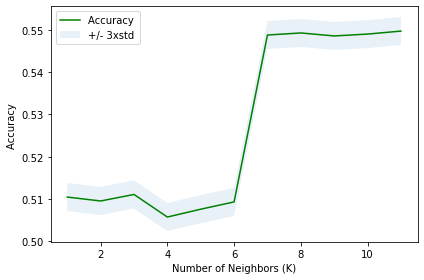

In [56]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [62]:
from sklearn.metrics import jaccard_similarity_score as jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [57]:
# Building the model again, using k=8
from sklearn.neighbors import KNeighborsClassifier
k = 8
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [69]:
KNN_yhat = DT_model.predict(X_test)
KNN_yhat

array([2, 2, 2, ..., 2, 2, 2])

In [79]:
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, KNN_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, KNN_yhat, average='weighted') )

KNN Jaccard index: 0.56
KNN F1-score: 0.47


#### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
DT_yhat = DT_model.predict(X_test)
DT_yhat

array([2, 2, 2, ..., 2, 2, 2])

In [75]:
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

DT Jaccard index: 0.56
DT F1-score: 0.47


#### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [73]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.55
LR F1-score: 0.55
LR LogLoss: 0.67


### Results and Discussion

Below table is the summary of three models. The best one is Logistic Regression model.

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.56    | 0.47     | NA      |
| Decision Tree      | 0.56    | 0.47     | NA      |
| LogisticRegression | 0.55    | 0.55     | 0.67    |

Of course there are plenty of other modelling methods we can apply, and the choice of different features will result in different results. Therefore there are many ways to improve the model.

### Conclusion

We tested three machine learning models designed to predict car accident severity based on given dataset. We focus on three factors - weather, road, and light conditions. Based on the results, we can conclude that particular conditions have clear impact on the chance getting injury. Proper alerts would possibly reduce the possibility and severity of car accidents.